In [46]:
#sentiment Analysis project

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer  
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score


In [47]:
#dataset import
df_train = pd.read_csv("train_tweets.txt",delimiter='\t',header=None)
df_train.head()
df_train = df_train.drop(columns=[3])

In [48]:
df_train.rename(columns={0: "IDF", 1: "Polarity", 2: "Tweet"}, inplace=True)
df_train.columns
df_train

,IDF,Polarity,Tweet
0,619971047195045888,-1,If these runway renovations at the airport pre...
1,620067692066828288,-1,Bad Blood may have the absolute worst lyricism...
2,620099074679701509,-1,My parents are going to the Zac Brown Band con...
3,620149443191533568,-1,The growth of gerontocracy: George Osborne's a...
4,620152459676282880,-1,The hidden Budget tax rises George Osborne did...
...,...,...,...
50099,620056364149309441,1,(1/2) Judge me if you want but Ima make sure I...
50100,620056577341562884,1,Good vibes to @Rashontae @RealMissMIusa as she...
50101,620063502682599425,1,No. It's okay. You can go attend Miss USA! Tru...
50102,620073648255168512,1,Tune into Reelz tomorrow at 7pm CT to support ...


In [49]:
#clean the tweets with a function
def cleanTweets(text):
    # Remove @mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  
    # Remove hashtags (but keep the text)
    text = re.sub(r'#', '', text)  
    # Remove RT (retweet indicator)
    text = re.sub(r'RT[\s]+', '', text)
    # Remove URLs
    text = re.sub(r'https?:\/\/\S+', '', text) 
    # Remove line breaks
    text = re.sub(r'\n', ' ', text)
    # Remove special characters and numbers (optional)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text
df_train['cleanedTweets'] = df_train['Tweet'].apply(cleanTweets) #apply cleanTweet function to the tweet
df_train.head() #compares original tweets with cleaned Tweets

,IDF,Polarity,Tweet,cleanedTweets
0,619971047195045888,-1,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...
1,620067692066828288,-1,Bad Blood may have the absolute worst lyricism...,bad blood may have the absolute worst lyricism...
2,620099074679701509,-1,My parents are going to the Zac Brown Band con...,my parents are going to the zac brown band con...
3,620149443191533568,-1,The growth of gerontocracy: George Osborne's a...,the growth of gerontocracy george osbornes ass...
4,620152459676282880,-1,The hidden Budget tax rises George Osborne did...,the hidden budget tax rises george osborne did...


In [50]:
df_train.isna().count()
type(df_train['Polarity'])
df_train['Polarity'] = pd.to_numeric(df_train['Polarity'], errors='coerce')

In [51]:
df_train['Polarity'].dtype
df_train

,IDF,Polarity,Tweet,cleanedTweets
0,619971047195045888,-1,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...
1,620067692066828288,-1,Bad Blood may have the absolute worst lyricism...,bad blood may have the absolute worst lyricism...
2,620099074679701509,-1,My parents are going to the Zac Brown Band con...,my parents are going to the zac brown band con...
3,620149443191533568,-1,The growth of gerontocracy: George Osborne's a...,the growth of gerontocracy george osbornes ass...
4,620152459676282880,-1,The hidden Budget tax rises George Osborne did...,the hidden budget tax rises george osborne did...
...,...,...,...,...
50099,620056364149309441,1,(1/2) Judge me if you want but Ima make sure I...,judge me if you want but ima make sure i dont ...
50100,620056577341562884,1,Good vibes to @Rashontae @RealMissMIusa as she...,good vibes to as she competes for miss usa tom...
50101,620063502682599425,1,No. It's okay. You can go attend Miss USA! Tru...,no its okay you can go attend miss usa trust m...
50102,620073648255168512,1,Tune into Reelz tomorrow at 7pm CT to support ...,tune into reelz tomorrow at pm ct to support a...


Polarity
 0    22499
 1    19779
-1     7826
Name: count, dtype: int64


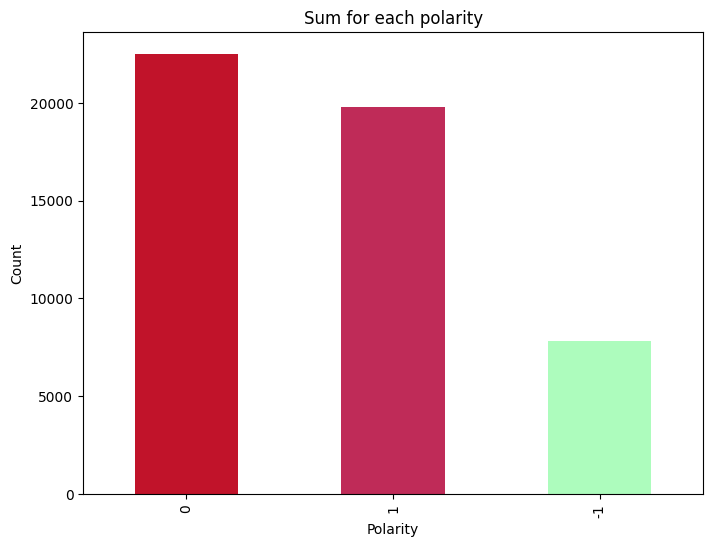

In [52]:
import matplotlib.pyplot as plt

filtered_counts = df_train['Polarity'].value_counts()
# Generate random colors
random_colors = np.random.rand(len(filtered_counts), 3)  # Generates random RGB values
print(filtered_counts)
filtered_counts.plot(kind='bar',color=[tuple(color) for color in random_colors], figsize=(8, 6))
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Sum for each polarity')

plt.show()


# **Remarque**
+ On remarque que les tweets qui ont un sentiment neutre domine la base de données. Cela suggère que les utilisateurs de Twitter sont plus susceptibles de partager des informations ou des faits plutôt que des opinions ou des sentiments. 

+ En contre partie , les tweets qui ont un sentiment positif sont moins nombreux que les tweets qui ont un sentiment negatifs 

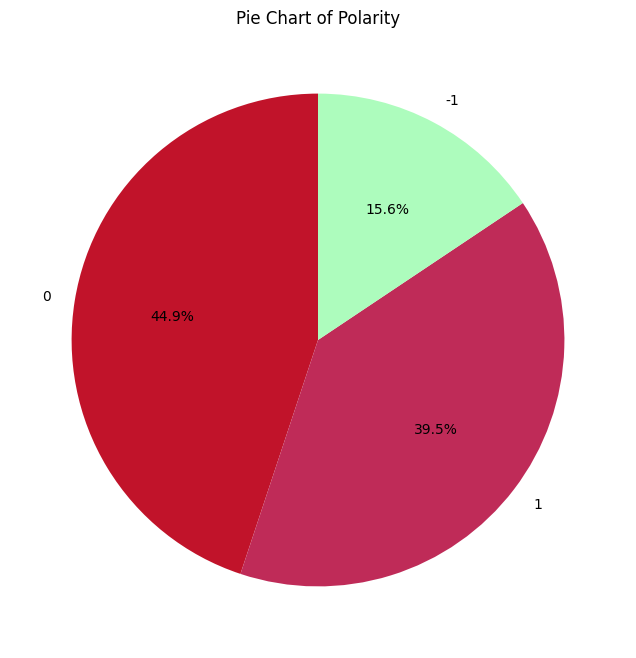

In [53]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_counts, labels=filtered_counts.index, colors=[tuple(color) for color in random_colors], 
        autopct='%1.1f%%', startangle=90)

plt.title('Pie Chart of Polarity')
plt.show()

In [54]:
print(df_train.describe())
print(df_train['Polarity'].value_counts(normalize=True) * 100)  # Percentage breakdown


                IDF      Polarity
count  5.010400e+04  50104.000000
mean   4.950650e+17      0.238564
std    1.941019e+17      0.702888
min    9.083248e+16     -1.000000
25%    2.634645e+17      0.000000
50%    6.297611e+17      0.000000
75%    6.395931e+17      1.000000
max    6.819105e+17      1.000000
Polarity
 0    44.904598
 1    39.475890
-1    15.619511
Name: proportion, dtype: float64


In [55]:
df_train['Tweet_length'] = df_train['cleanedTweets'].apply(len)
df_train['Tweet_length'].describe()


count    50104.000000
mean        97.779099
std         47.874809
min          0.000000
25%         81.000000
50%        102.000000
75%        116.000000
max       7220.000000
Name: Tweet_length, dtype: float64

# **World Cloud**

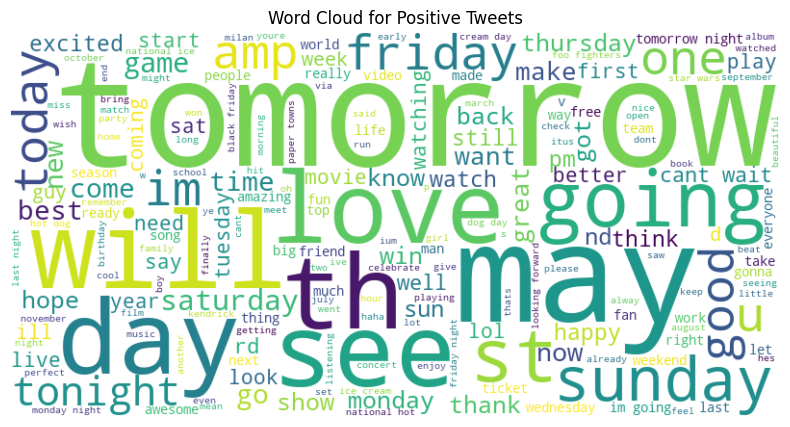

In [56]:
from wordcloud import WordCloud

positive_tweets = ' '.join(df_train[df_train['Polarity'] == 1]['cleanedTweets'])
negative_tweets = ' '.join(df_train[df_train['Polarity'] == -1]['cleanedTweets'])
neutral_tweets = ' '.join(df_train[df_train['Polarity'] == 0]['cleanedTweets'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Tweets')
plt.show()


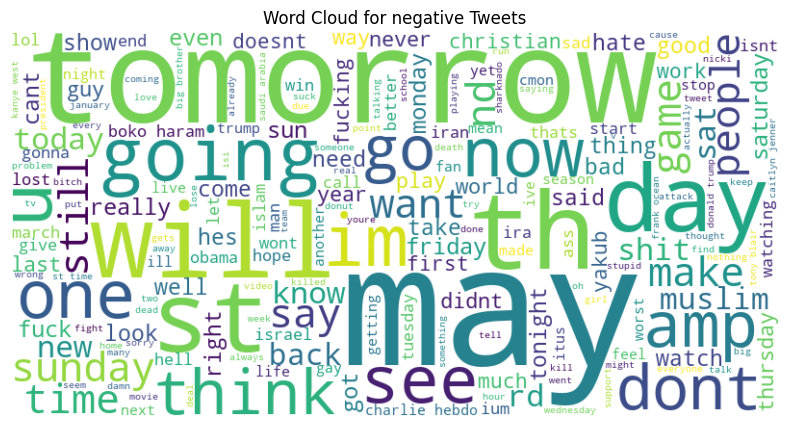

In [57]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for negative Tweets')
plt.show()

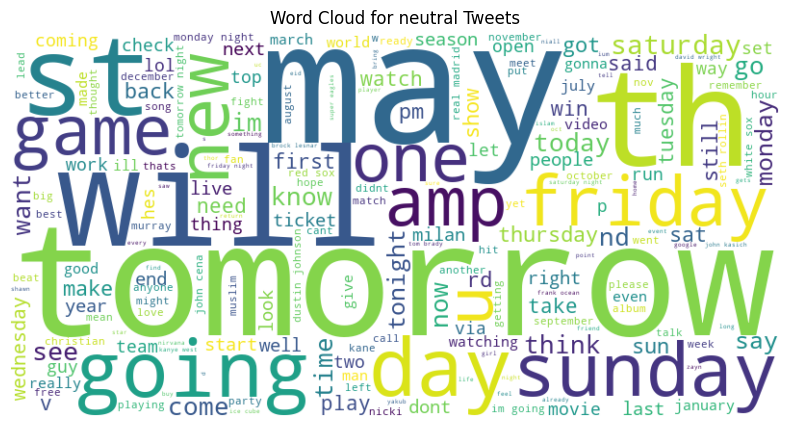

In [58]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_tweets)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for neutral Tweets')
plt.show()

## Boxplot

C:\Users\essol\AppData\Local\Temp\ipykernel_14108\519110178.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_train[df_train['Polarity'] == 1]['Tweet_length'],


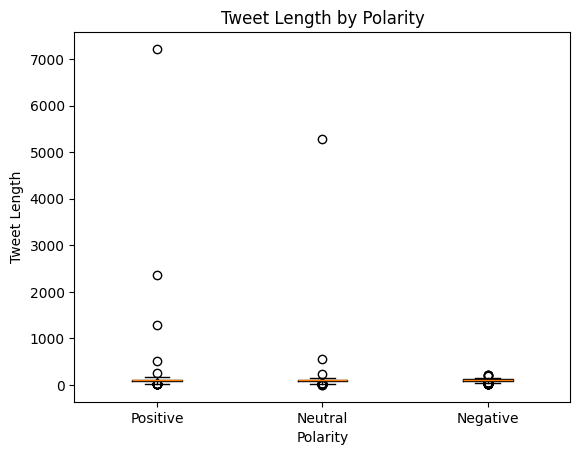

In [59]:
plt.boxplot([df_train[df_train['Polarity'] == 1]['Tweet_length'],
             df_train[df_train['Polarity'] == 0]['Tweet_length'],
             df_train[df_train['Polarity'] == -1]['Tweet_length']],
            labels=['Positive', 'Neutral', 'Negative'])
plt.title('Tweet Length by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Tweet Length')
plt.show()


D'après le boxplot, il semble que les tweets neutres aient une plage de longueurs plus large par rapport aux tweets positifs et négatifs, ce qui peut indiquer que les tweets neutres ont tendance à être plus longs ou plus variables en longueur. Cependant, les longueurs médianes (ligne centrale dans les boîtes) semblent relativement similaires à travers les trois sentiments, ce qui suggère que le sentiment pourrait ne pas avoir un impact fort sur la longueur typique des tweets.

Pour obtenir une compréhension plus claire, on pourrai effectuer un test statistique, comme une ANOVA!

# **ANOVA : analysis of variance**

In [60]:
# Calculate tweet lengths for each sentiment category
positive_tweet_lengths = df_train[df_train['Polarity'] == 1]['cleanedTweets'].apply(len)
negative_tweet_lengths = df_train[df_train['Polarity'] == -1]['cleanedTweets'].apply(len)
neutral_tweet_lengths = df_train[df_train['Polarity'] == 0]['cleanedTweets'].apply(len)

# Check the first few values to verify
print(positive_tweet_lengths.head())
print(negative_tweet_lengths.head())
print(neutral_tweet_lengths.head())


30325    121
30326    110
30327     73
30328    122
30329    111
Name: cleanedTweets, dtype: int64
0    122
1    126
2     83
3     63
4     71
Name: cleanedTweets, dtype: int64
7826    121
7827     97
7828     84
7829     95
7830    133
Name: cleanedTweets, dtype: int64


In [61]:
import scipy.stats as stats

# Perform ANOVA on the tweet lengths
f_statistic, p_value = stats.f_oneway(positive_tweet_lengths, negative_tweet_lengths, neutral_tweet_lengths)

# Print the result
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")


F-statistic: 54.95781244675674
P-value: 1.4396891231708587e-24


### Explication de l'ANOVA sur les longueurs des tweets

Imaginons que nous avons trois boîtes, chacune représentant un type de sentiment : 
- La boîte **rouge** pour les tweets **positifs**,
- La boîte **bleue** pour les tweets **négatifs**,
- La boîte **verte** pour les tweets **neutres**.

Chaque boîte contient des tweets, et ce que nous voulons savoir, c'est si les **longueurs des tweets** dans chaque boîte sont différentes, ou si elles sont à peu près égales.

### Ce que nous faisons :

1. **Mesurer la longueur des tweets dans chaque catégorie** :  
   Nous mesurons la longueur de chaque tweet (c'est-à-dire combien de caractères il contient). Chaque tweet est donc un "bonbon" dans une boîte. Nous avons donc une série de longueurs de tweets pour chaque sentiment.

2. **Comparer les longueurs des tweets entre les différentes catégories** :  
   Nous utilisons l'**ANOVA** (Analyse de la Variance) pour voir si les moyennes des longueurs des tweets dans chaque groupe (positif, négatif, neutre) sont très différentes ou si elles sont plutôt similaires.

### Ce que les résultats de l'ANOVA nous disent :

- **F-statistique** : Cela nous indique si la différence entre les moyennes des longueurs des tweets dans chaque catégorie est grande. Plus le F-statistique est élevé, plus cela signifie qu'il y a une grande différence entre les groupes.
  
- **P-value** : C'est la probabilité que la différence observée soit due au hasard. Si la **P-value est très petite**, cela signifie que la différence entre les moyennes des groupes est **réelle** et non due au hasard. En général, si la P-value est inférieure à 0.05, nous rejetons l'hypothèse nulle et concluons qu'il existe une différence significative entre les groupes.

### Résultats de notre analyse :

- **F-statistique** : 54.95 ~ 55  
  Cela nous dit qu'il y a une différence importante entre les moyennes des longueurs des tweets dans chaque groupe.
  
- **P-value** : 1.43e-24  
  Cette valeur est extrêmement petite, ce qui signifie qu'il existe une différence significative entre les groupes. Les moyennes des longueurs de tweets dans les catégories **positif**, **négatif**, et **neutre** ne sont pas les mêmes.

### Conclusion :

Les résultats de l'ANOVA montrent que les **longueurs des tweets** varient de manière significative en fonction du **sentiment** (positif, négatif, neutre). Il y a donc une différence réelle entre les moyennes des longueurs de tweets pour chaque sentiment.


Polarity
-1    102.974572
 0     96.670696
 1     96.984226
Name: Tweet_length, dtype: float64


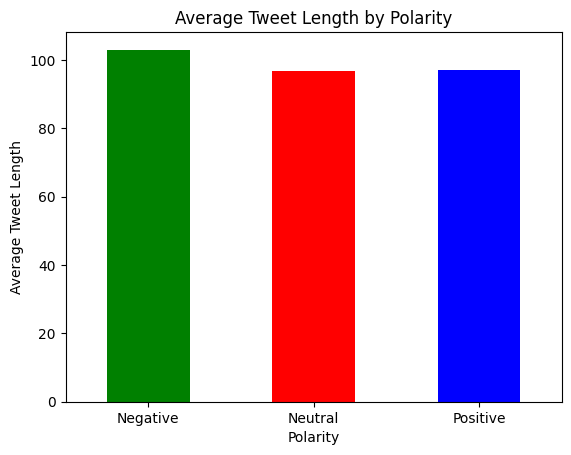

In [66]:
# Calculate the average tweet length per polarity
avg_tweet_length = df_train.groupby('Polarity')['Tweet_length'].mean()

# Check the result
print(avg_tweet_length)
import matplotlib.pyplot as plt

# Plot the average tweet length per polarity
avg_tweet_length.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Average Tweet Length by Polarity')
plt.xlabel('Polarity')
plt.ylabel('Average Tweet Length')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()


# Remarque 
+ ***les tweets negatifs sont plusou moins  longs que les tweets positifs et neutres*** .

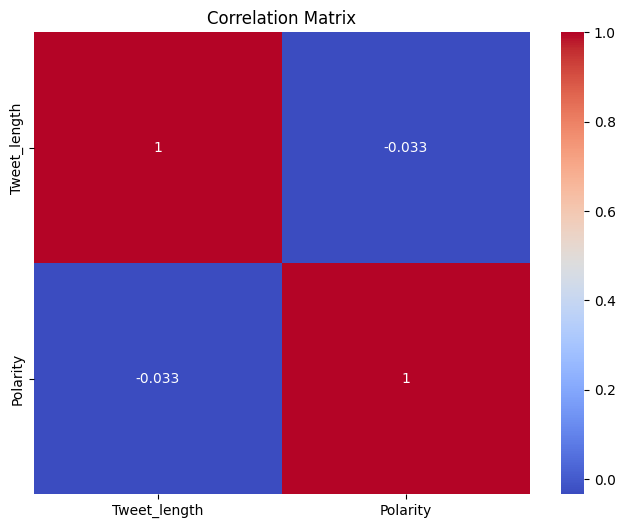

,IDF,Polarity,Tweet,cleanedTweets,Tweet_length
0,619971047195045888,-1,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...,122
1,620067692066828288,-1,Bad Blood may have the absolute worst lyricism...,bad blood may have the absolute worst lyricism...,126
2,620099074679701509,-1,My parents are going to the Zac Brown Band con...,my parents are going to the zac brown band con...,83
3,620149443191533568,-1,The growth of gerontocracy: George Osborne's a...,the growth of gerontocracy george osbornes ass...,63
4,620152459676282880,-1,The hidden Budget tax rises George Osborne did...,the hidden budget tax rises george osborne did...,71
...,...,...,...,...,...
50099,620056364149309441,1,(1/2) Judge me if you want but Ima make sure I...,judge me if you want but ima make sure i dont ...,125
50100,620056577341562884,1,Good vibes to @Rashontae @RealMissMIusa as she...,good vibes to as she competes for miss usa tom...,74
50101,620063502682599425,1,No. It's okay. You can go attend Miss USA! Tru...,no its okay you can go attend miss usa trust m...,85
50102,620073648255168512,1,Tune into Reelz tomorrow at 7pm CT to support ...,tune into reelz tomorrow at pm ct to support a...,112


In [63]:
import seaborn as sns
# Correlation Matrix
correlation_matrix = df_train[['Tweet_length', 'Polarity']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
df_train

In [64]:
# Get the maximum tweet length
max_length = df_train['Tweet_length'].max()

# Filter the DataFrame to get the row(s) with the maximum length and retrieve the index (ID)
max_length_tweet = df_train[df_train['Tweet_length'] == max_length]

# Print the ID and tweet with maximum length
print("Tweet(s) with maximum length and their IDs:")
print(max_length_tweet[['IDF', 'Tweet']])


Tweet(s) with maximum length and their IDs:
                      IDF                                              Tweet
38317  641638563675770881  @106andpark: Did you enjoy last night's Life O...


In [65]:
df_train

,IDF,Polarity,Tweet,cleanedTweets,Tweet_length
0,619971047195045888,-1,If these runway renovations at the airport pre...,if these runway renovations at the airport pre...,122
1,620067692066828288,-1,Bad Blood may have the absolute worst lyricism...,bad blood may have the absolute worst lyricism...,126
2,620099074679701509,-1,My parents are going to the Zac Brown Band con...,my parents are going to the zac brown band con...,83
3,620149443191533568,-1,The growth of gerontocracy: George Osborne's a...,the growth of gerontocracy george osbornes ass...,63
4,620152459676282880,-1,The hidden Budget tax rises George Osborne did...,the hidden budget tax rises george osborne did...,71
...,...,...,...,...,...
50099,620056364149309441,1,(1/2) Judge me if you want but Ima make sure I...,judge me if you want but ima make sure i dont ...,125
50100,620056577341562884,1,Good vibes to @Rashontae @RealMissMIusa as she...,good vibes to as she competes for miss usa tom...,74
50101,620063502682599425,1,No. It's okay. You can go attend Miss USA! Tru...,no its okay you can go attend miss usa trust m...,85
50102,620073648255168512,1,Tune into Reelz tomorrow at 7pm CT to support ...,tune into reelz tomorrow at pm ct to support a...,112
